In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Titanic_Dataset/train.csv')

In [3]:
test_data = pd.read_csv('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Titanic_Dataset/test.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_data.shape[0]

891

<Axes: ylabel='Density'>

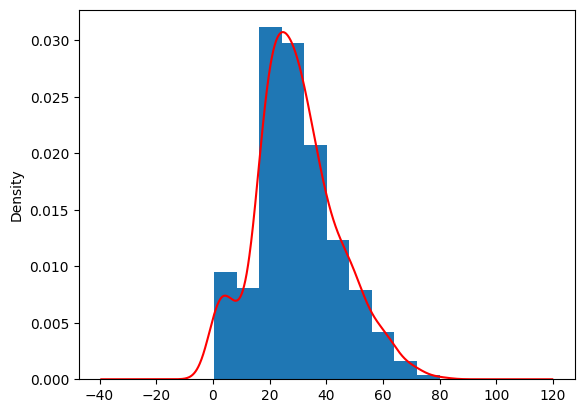

In [7]:
axes = train_data['Age'].hist(bins = 10, density = True)
train_data['Age'].plot(kind = 'density', color = 'Red')

In [8]:
import seaborn as sns

<Axes: xlabel='Embarked', ylabel='count'>

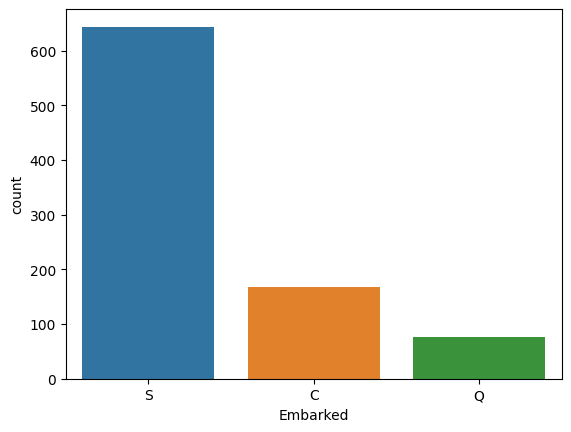

In [9]:
sns.countplot(x = 'Embarked', data = train_data)

In [10]:
all_data = train_data.copy()
train_data['Age'].fillna(train_data['Age'].median(), inplace = True)
train_data['Embarked'].fillna(train_data['Embarked'].value_counts().idxmax(), inplace=True)

In [11]:
train_data['Embarked'].value_counts().idxmax()

'S'

In [12]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<Axes: ylabel='Density'>

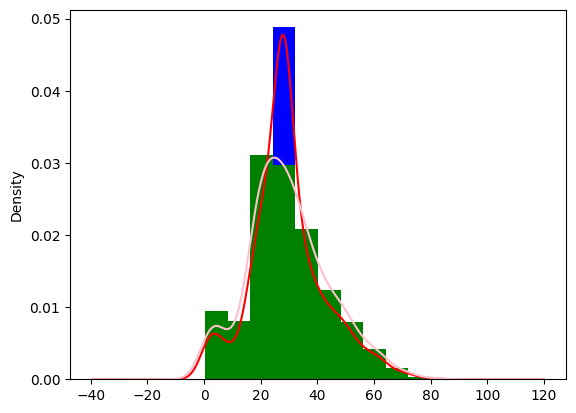

In [13]:
axes = train_data['Age'].hist(bins = 10, density = True, color = 'blue')
train_data['Age'].plot(kind = 'density', color = 'Red')
axes = all_data['Age'].hist(bins = 10, density = True, color = 'green')
all_data['Age'].plot(kind = 'density', color = 'Pink')

In [14]:
train_data['Travel_Alone'] = np.where((train_data['SibSp'] + train_data['Parch']) > 0, 0, 1)

In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Travel_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [16]:
train_data.drop(['SibSp', 'Parch', 'Cabin', 'Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

In [17]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Travel_Alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


<Axes: ylabel='Density'>

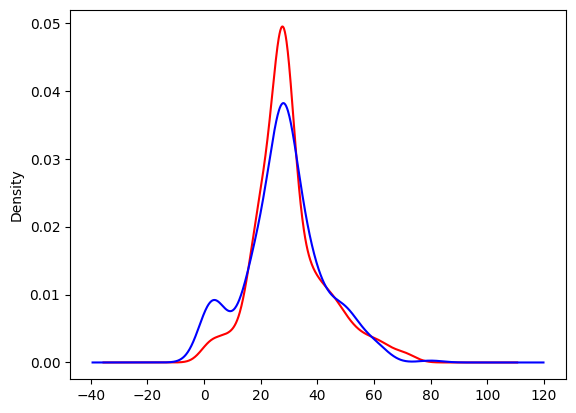

In [25]:
train_data['Age'][train_data.Survived == 0].plot(kind = 'density', color = 'Red')
train_data['Age'][train_data.Survived == 1].plot(kind = 'density', color = 'Blue')

<Axes: xlabel='Age', ylabel='Density'>

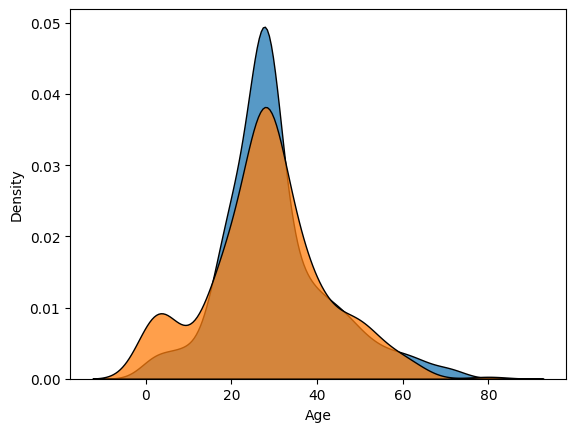

In [31]:
sns.kdeplot(data = train_data['Age'][train_data.Survived == 0], multiple="stack")
sns.kdeplot(data = train_data['Age'][train_data.Survived == 1], multiple="stack")

In [27]:
sns.kdeplot?

In [32]:
train_data = pd.get_dummies(train_data, columns = ['Sex', 'Embarked'])

In [33]:
train_data

,Survived,Pclass,Age,Fare,Travel_Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,0,1,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,0,0
2,1,3,26.0,7.9250,1,1,0,0,0,1
3,1,1,35.0,53.1000,0,1,0,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,0,1,0,0,1
887,1,1,19.0,30.0000,1,1,0,0,0,1
888,0,3,28.0,23.4500,0,1,0,0,0,1
889,1,1,26.0,30.0000,1,0,1,1,0,0


In [34]:
# train_data['Male'] = np.where(train_data['Male'] == True, 1, 0)

<Axes: xlabel='Fare', ylabel='Density'>

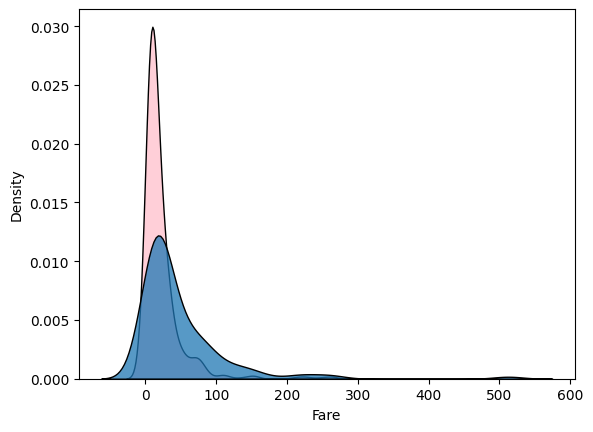

In [36]:
sns.kdeplot(data = train_data['Fare'][train_data.Survived == 0], multiple="stack", color = 'Pink')
sns.kdeplot(data = train_data['Fare'][train_data.Survived == 1], multiple="stack")

<Axes: xlabel='Pclass', ylabel='Survived'>

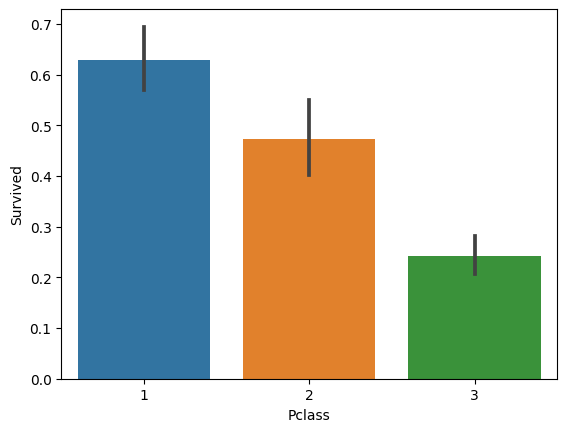

In [38]:
sns.barplot(data = train_data, x = 'Pclass', y = 'Survived')

<Axes: xlabel='Embarked', ylabel='Survived'>

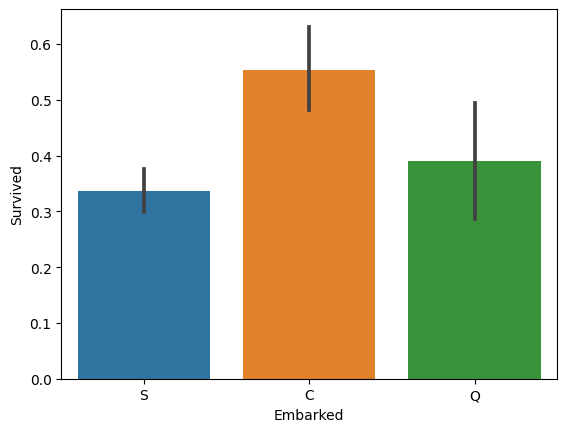

In [41]:
sns.barplot(data = all_data, x = 'Embarked', y = 'Survived')

<Axes: xlabel='Sex', ylabel='Survived'>

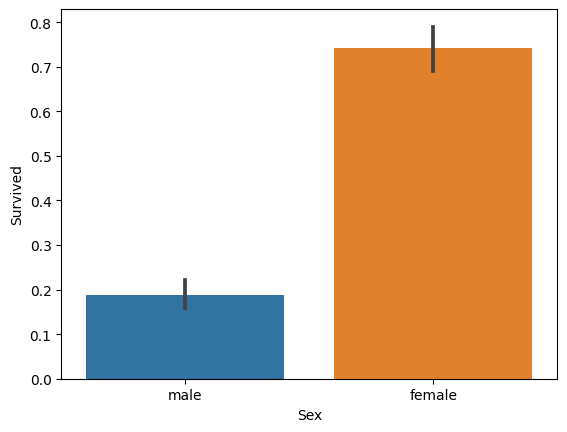

In [42]:
sns.barplot(data = all_data, x = 'Sex', y = 'Survived')

<Axes: xlabel='Sex', ylabel='Fare'>

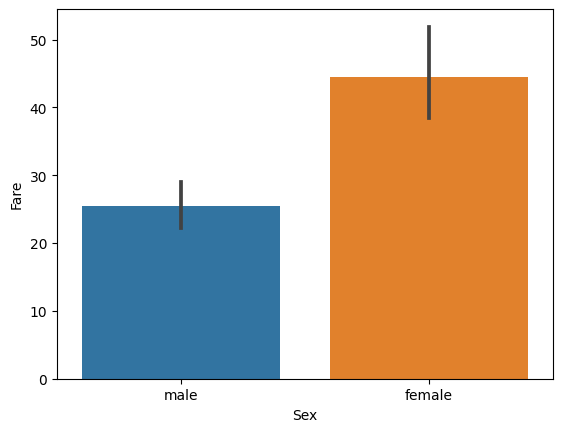

In [46]:
sns.barplot(data = all_data, x = 'Sex', y = 'Fare')

<Axes: >

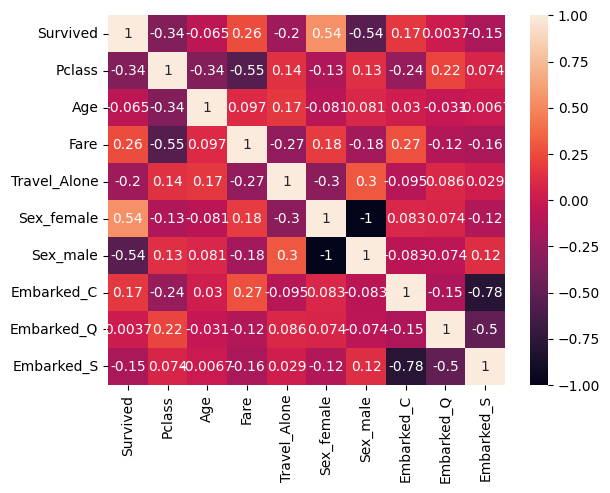

In [48]:
sns.heatmap(train_data.corr(), annot=True)

<Axes: >

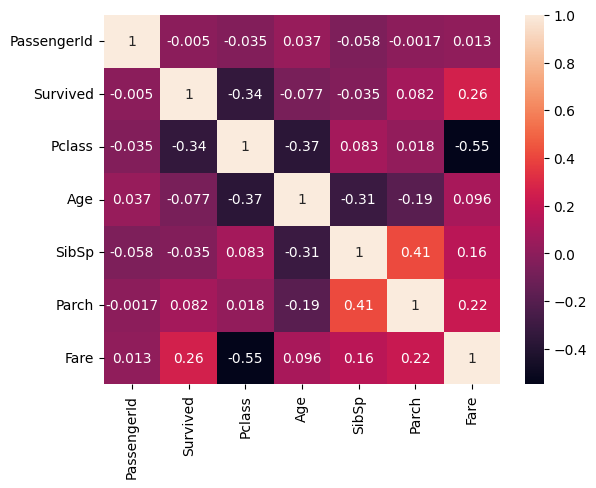

In [49]:
sns.heatmap(all_data.corr(), annot=True)